# Tree-Based Intelligent Intrusion Detection System in Internet of Vehicles
This is the code for the paper entitled "[**Tree-Based Intelligent Intrusion Detection System in Internet of Vehicles**](https://arxiv.org/pdf/1910.08635.pdf)" published in IEEE GlobeCom 2019.  
Authors: Li Yang (liyanghart@gmail.com), Abdallah Moubayed, Ismail Hamieh, and Abdallah Shami  
Organization: The Optimized Computing and Communications (OC2) Lab, ECE Department, Western University

If you find this repository useful in your research, please cite:  
L. Yang, A. Moubayed, I. Hamieh and A. Shami, "Tree-Based Intelligent Intrusion Detection System in Internet of Vehicles," 2019 IEEE Global Communications Conference (GLOBECOM), 2019, pp. 1-6, doi: 10.1109/GLOBECOM38437.2019.9013892.  

## Import libraries

In [ ]:
# improving code readability and reducing distractions
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance

In [ ]:
# Mounting google drive in colab notebook || run only one time
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Reading the dataset
df = pd.read_csv('/content/drive/MyDrive/CICIDS2017_sample.csv')

In [ ]:
# On executing df command, the notebook will display the DataFrame's contents
df

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,4,2,0,37,0,31,6,18.500000,17.677670,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,142377,46,62,1325,105855,570,0,28.804348,111.407285,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,118873,23,28,1169,45025,570,0,50.826087,156.137367,2896,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,143577,43,55,1301,107289,570,0,30.255814,115.178969,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,143745,49,59,1331,110185,570,0,27.163265,108.067176,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56656,234,2,2,64,232,32,32,32.000000,0.000000,116,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
56657,133288,2,2,94,482,47,47,47.000000,0.000000,241,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
56658,11507694,5,4,450,3525,450,0,90.000000,201.246118,3525,...,32,893.0,0.0,893,893,6503640.0,0.0,6503640,6503640,DoS
56659,11507707,8,6,416,11632,416,0,52.000000,147.078211,5792,...,32,897.0,0.0,897,897,6503122.0,0.0,6503122,6503122,DoS


In [ ]:
# Here we are asking Pandas to count how many times each unique value appears in the 'Label' column in the dataframe.
df.Label.value_counts()

BENIGN          22731
DoS             19035
PortScan         7946
BruteForce       2767
WebAttack        2180
Bot              1966
Infiltration       36
Name: Label, dtype: int64

### Data sampling
Due to the space limit of GitHub files, we sample a small-sized subset for model learning using random sampling.
Original data have approx 3 lakh entries so they do sampling and we get a file of name CICIDS2017_sample.csv with 56661 rows.


Data sampling is a process used in statistics and data analysis to select a subset or portion of a larger dataset for the purpose of analysis.
Random sampling involves selecting data points from the population in a way that each data point has an equal and independent chance of being chosen. It helps ensure that the sample is representative of the population.

In [ ]:
# Shortening the data on the basis of fractions of class
df_minor = df[(df['Label']=='WebAttack')|(df['Label']=='Bot')|(df['Label']=='Infiltration')]
df_BENIGN = df[(df['Label']=='BENIGN')]
df_BENIGN = df_BENIGN.sample(n=None, frac=0.01, replace=False, weights=None, random_state=None, axis=0)
df_DoS = df[(df['Label']=='DoS')]
df_DoS = df_DoS.sample(n=None, frac=0.05, replace=False, weights=None, random_state=None, axis=0)
df_PortScan = df[(df['Label']=='PortScan')]
df_PortScan = df_PortScan.sample(n=None, frac=0.05, replace=False, weights=None, random_state=None, axis=0)
df_BruteForce = df[(df['Label']=='BruteForce')]
df_BruteForce = df_BruteForce.sample(n=None, frac=0.2, replace=False, weights=None, random_state=None, axis=0)

In [ ]:
# The provided code is used to combine several DataFrames (df_BENIGN, df_DoS, df_PortScan, df_BruteForce, and df_minor) into a single DataFrame called df_s.
df_s = df_BENIGN.append(df_DoS).append(df_PortScan).append(df_BruteForce).append(df_minor)

In [ ]:
df_s


,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
37377,164,2,2,90,166,45,45,45.00,0.000000,83,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
26599,31132,2,2,88,200,44,44,44.00,0.000000,100,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
24105,50,1,1,6,6,6,6,6.00,0.000000,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
38217,61529,2,2,76,376,38,38,38.00,0.000000,188,...,40,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
25884,61328,1,1,46,163,46,46,46.00,0.000000,163,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31732,5005388,5,3,599,2021,599,0,119.80,267.880944,2021,...,32,0.0,0.0,0,0,0.0,0.0,0,0,WebAttack
31735,5016759,5,5,599,4149,599,0,119.80,267.880944,2701,...,32,0.0,0.0,0,0,0.0,0.0,0,0,WebAttack
31738,5009163,4,4,599,2021,599,0,149.75,299.500000,2021,...,32,0.0,0.0,0,0,0.0,0.0,0,0,WebAttack
31739,73,1,1,0,0,0,0,0.00,0.000000,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,WebAttack


In [ ]:
df_s = df_s.sort_index()

# if you want to sort in decreasing order use the following comand
# df_s = df_s.sort_index(ascending=False)

In [ ]:
# Save the generated data (shorten data) in a new csv file in drive
df_s.to_csv('/content/drive/MyDrive/CICIDS2017_mod.csv',index=0)

### Preprocessing (normalization and padding values)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CICIDS2017_mod.csv')

### MIN-MAX Normalization
Min-Max scaling, also known as feature scaling or min-max normalization, is a data preprocessing technique used in machine learning and data analysis to scale numerical features in a dataset to a specific range, typically [0, 1].

Scaled Value = (Value - Min) / (Max - Min)

Here, "Value" is the original value, "Min" is the minimum value of the feature, and "Max" is the maximum value of the feature. The result, the scaled value, will fall within the specified range ([0, 1] in most cases).

In [ ]:
# Min-max normalization
numeric_features = df.dtypes[df.dtypes != 'object'].index
df[numeric_features] = df[numeric_features].apply(
    lambda x: (x - x.min()) / (x.max()-x.min()))
# Below code replaces any missing or NaN (Not-a-Number) values in the DataFrame with the value 0.
# Filling missing values with 0 is a common approach when you want to handle or remove the impact of missing data on subsequent calculations or modeling.
df = df.fillna(0)

### Split train_set and test_set

In [ ]:
# The LabelEncoder is used to convert categorical labels (in this case, the "Label" column) into numerical labels.
# It assigns a unique integer to each category in the label column.
labelencoder = LabelEncoder()
# This line is using the LabelEncoder to transform the values in the last column of the DataFrame df.
# It takes the labels in the "Label" column (the -1 index refers to the last column), converts them to numerical labels
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])

# We can check the label encoding by executing the following snippet
# To obtain the mapping of encoded labels to original labels
##label_mapping = dict(zip(labelencoder.transform(labelencoder.classes_), labelencoder.classes_))
# for Print the mapping
##print(label_mapping)

# This line creates the feature matrix X by dropping the "Label" column from the DataFrame and converting the remaining data into a NumPy array.
# We can see the X by executing print(X) also for y.
X = df.drop(['Label'],axis=1).values
# Here, we're creating the target vector y. It takes the transformed numerical labels (the last column) from the DataFrame and reshapes it into a 2D array,
y = df.iloc[:, -1].values.reshape(-1,1)
# This line further reshapes the y array to be a 1D array. (Step sometimes necessary for specific machine learning algorithms that expect the target to be a 1D array.)
y=np.ravel(y)
# X_train contains 80% of your feature data for training.
# X_test contains 20% of your feature data for testing.
# y_train contains the corresponding target labels for the training set.
# y_test contains the corresponding target labels for the test set
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 0,stratify = y)

In [ ]:
# X_train.shape command allows you to check the dimensions or shape of the X_train NumPy array.
# The shape of an array is given in the form (n_samples, n_features), where:
# n_samples is the number of data points or samples in the array.
# n_features is the number of features (columns) in the array.

X_train.shape

(4417, 77)

In [ ]:
# pd.Series(y_train).value_counts() -- to compute the count of unique values in the y_train array and present the result as a Pandas Series.
# y_train: This is your training set's target variable, which typically contains the labels or classes that you want to count.
# pd.Series(): This part converts the y_train array into a Pandas Series (1D array-like data structure).
# .value_counts(): This method, when applied to a Pandas Series, counts the occurrences of unique values in that Series and returns the counts as a new Series.

pd.Series(y_train).value_counts()

6    1526
1    1376
3     666
2     387
5     278
0     159
4      25
dtype: int64

### Oversampling by SMOTE (Synthetic Minority Over-sampling Technique)

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={4:1500}) # Create 1500 samples for the minority class "4"

In [ ]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
pd.Series(y_train).value_counts()

6    1526
4    1500
1    1376
3     666
2     387
5     278
0     159
dtype: int64

In [ ]:
X_train.shape

(5892, 77)

### Duplicate Feature Selection


In [ ]:
# Assuming you have loaded your data into pandas DataFrames
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.Series(y_train)
X_test_df = pd.DataFrame(X_test)

# check for duplicated features in the training set:

# create an empty dictionary, where we will store
# the groups of duplicates
duplicated_feat_pairs = {}

# create an empty list to collect features
# that were found to be duplicated
_duplicated_feat = []


# iterate over every feature in our dataset:
for i in range(0, len(X_train_df.columns)):

    # this bit helps me understand where the loop is at:
    if i % 10 == 0:
        print(i)

    # choose 1 feature:
    feat_1 = X_train_df.columns[i]

    # check if this feature has already been identified
    # as a duplicate of another one. If it was, it should be stored in
    # our _duplicated_feat list.

    # If this feature was already identified as a duplicate, we skip it, if
    # it has not yet been identified as a duplicate, then we proceed:
    if feat_1 not in _duplicated_feat:

        # create an empty list as an entry for this feature in the dictionary:
        duplicated_feat_pairs[feat_1] = []

        # now, iterate over the remaining features of the dataset:
        for feat_2 in X_train_df.columns[i + 1:]:

            # check if this second feature is identical to the first one
            if X_train_df[feat_1].equals(X_train_df[feat_2]):

                # if it is identical, append it to the list in the dictionary
                duplicated_feat_pairs[feat_1].append(feat_2)

                # and append it to our monitor list for duplicated variables
                _duplicated_feat.append(feat_2)

                # done!


0
10
20
30
40
50
60
70


In [ ]:
# Create a dictionary to store the count of duplicate features for each duplicated feature pair
duplicate_feature_counts = {}
total_duplicate_count = 0  # Initialize total count to 0

# Iterate through the duplicated_feat_pairs dictionary to access and display the duplicated feature values
for feature, duplicates in duplicated_feat_pairs.items():
    if duplicates:
        print(f"Feature: {feature}")
        duplicate_feature_counts[feature] = len(duplicates)  # Count of duplicate features
        total_duplicate_count += len(duplicates)  # Update the total count
        for duplicate_feature in duplicates:
            duplicated_values = X_train_df[feature]
            duplicate_values = X_train_df[duplicate_feature]
            if duplicated_values.equals(duplicate_values):
                print(f"Duplicated Feature: {duplicate_feature}")
                print(f"Sample Values: {duplicated_values.head()}")  # Display the first few values of the duplicated features
                print("\n")

# Print the count of duplicate features for each feature
for feature, count in duplicate_feature_counts.items():
    print(f"Count of duplicate features for {feature}: {count}")

# Print the total count of duplicated features
print(f"Total Count of Duplicated Features: {total_duplicate_count}")


Feature: 1
Duplicated Feature: 61
Sample Values: 0    0.000543
1    0.000362
2    0.000362
3    0.000362
4    0.001449
Name: 1, dtype: float64


Feature: 2
Duplicated Feature: 63
Sample Values: 0    0.000543
1    0.000181
2    0.000724
3    0.000181
4    0.001086
Name: 2, dtype: float64


Feature: 3
Duplicated Feature: 62
Sample Values: 0    0.000072
1    0.000000
2    0.000009
3    0.000000
4    0.000241
Name: 3, dtype: float64


Feature: 4
Duplicated Feature: 64
Sample Values: 0    0.000046
1    0.000000
2    0.003970
3    0.000000
4    0.003966
Name: 4, dtype: float64


Feature: 7
Duplicated Feature: 52
Sample Values: 0    0.008711
1    0.000000
2    0.001459
3    0.000000
4    0.012942
Name: 7, dtype: float64


Feature: 11
Duplicated Feature: 53
Sample Values: 0    0.011551
1    0.000000
2    0.750388
3    0.000000
4    0.499741
Name: 11, dtype: float64


Feature: 13
Duplicated Feature: 14
Sample Values: 0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 13, dtype: float64


Duplic

In [ ]:
# Create a set to keep track of the features that have been removed
removed_features = set()

# Iterate through the duplicated_feat_pairs dictionary to access and remove duplicated feature values
for feature, duplicates in duplicated_feat_pairs.items():
    if duplicates:
        for duplicate_feature in duplicates:
            # Check if the feature has already been removed to avoid redundant removal
            if duplicate_feature not in removed_features:
                X_train_df.drop(columns=duplicate_feature, inplace=True)
                X_test_df.drop(columns=duplicate_feature, inplace=True)
                removed_features.add(duplicate_feature)

# Print the removed features as a list
removed_features_list = list(removed_features)
print("Removed Features:")
print(removed_features_list)

# Convert DataFrames to NumPy arrays
X_train_selected = X_train_df.to_numpy()
X_test_selected = X_test_df.to_numpy()


Removed Features:
[14, 30, 31, 32, 43, 44, 48, 49, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]


In [ ]:
X_train_selected.shape

(5892, 56)

In [ ]:
print("Original X_train shape:", X_train.shape)
print("Selected X_train shape:", X_train_selected.shape)
print("Original X_test shape:", X_test.shape)
print("Selected X_test shape:", X_test_selected.shape)


Original X_train shape: (5892, 77)
Selected X_train shape: (5892, 56)
Original X_test shape: (1894, 77)
Selected X_test shape: (1894, 56)


## Machine learning model training

Accuracy of AdaBoost: 0.5195353748680043
Precision of AdaBoost: 0.5626987837744667
Recall of AdaBoost: 0.5195353748680043
F1-score of AdaBoost: 0.49652734930976944
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.53      0.24      0.33       590
           2       0.00      0.00      0.00       166
           3       0.35      0.99      0.52       286
           4       0.03      0.64      0.05        11
           5       0.00      0.00      0.00       119
           6       0.99      0.85      0.91       654

    accuracy                           0.52      1894
   macro avg       0.27      0.39      0.26      1894
weighted avg       0.56      0.52      0.50      1894



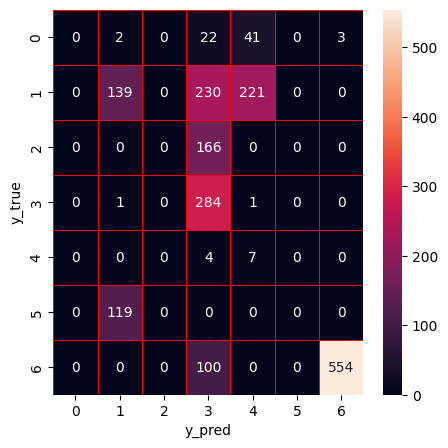


Training Time: 0.34 seconds		Prediction Time: 0.0111 seconds		Testing Time: 0.57 seconds


In [ ]:
# Start recording training time
start_time = time.time()

# Creating an AdaBoostClassifier with 10 base estimators
adaboost = AdaBoostClassifier(n_estimators=10)

# instructing AdaBoost model to learn from the provided training data
adaboost.fit(X_train_selected, y_train)

# Stop recording training time
end_time = time.time()

# Calculate the training time in seconds
training_time = end_time - start_time

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Start recording testing time
start_time = time.time()

# Calculating accuracy of AdaBoost Classifier
adaboost_score = adaboost.score(X_test_selected, y_test)

# Use the trained AdaBoost Classifier to make predictions on the test data (X_test_selected), and the predictions are stored in the y_predict_adaboost variable.
# Simultaneouly Calculating prediction time
# Start recording prediction time
start_time = time.time()
y_predict_adaboost = adaboost.predict(X_test_selected)
# Stop recording training time
end_time = time.time()
# Calculate the prediction time in seconds
prediction_time = end_time - start_time

# Copying y_test in y_true_adaboost variable for comparison and evaluation purposes.
y_true_adaboost = y_test

# Calculating several important classification evaluation metrics, including precision, recall, F1-score, and support.
precision_adaboost, recall_adaboost, fscore_adaboost, support_adaboost = precision_recall_fscore_support(y_true_adaboost, y_predict_adaboost, average='weighted')

print('Accuracy of AdaBoost: ' + str(adaboost_score))
print('Precision of AdaBoost: ' + str(precision_adaboost))
print('Recall of AdaBoost: ' + str(recall_adaboost))
print('F1-score of AdaBoost: ' + str(fscore_adaboost))
print(classification_report(y_true_adaboost, y_predict_adaboost))

# This snippet of code is used to create a heatmap of a confusion matrix
cm_adaboost = confusion_matrix(y_true_adaboost, y_predict_adaboost)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_adaboost, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Stop recording testing time
end_time = time.time()

# Calculate the testing time in seconds
testing_time = end_time - start_time

print()
print(f"Training Time: {training_time:.2f} seconds\t\tPrediction Time: {prediction_time:.4f} seconds\t\tTesting Time: {testing_time:.2f} seconds")

Accuracy of Decision tree: 0.9899683210137276
Precision of Decision tree: 0.9899637644732248
Recall of Decision tree: 0.9899683210137276
F1-score of Decision tree: 0.9898994789239495
              precision    recall  f1-score   support

           0       0.88      0.87      0.87        68
           1       1.00      1.00      1.00       590
           2       0.98      1.00      0.99       166
           3       0.98      0.99      0.98       286
           4       1.00      0.82      0.90        11
           5       1.00      1.00      1.00       119
           6       1.00      1.00      1.00       654

    accuracy                           0.99      1894
   macro avg       0.98      0.95      0.96      1894
weighted avg       0.99      0.99      0.99      1894



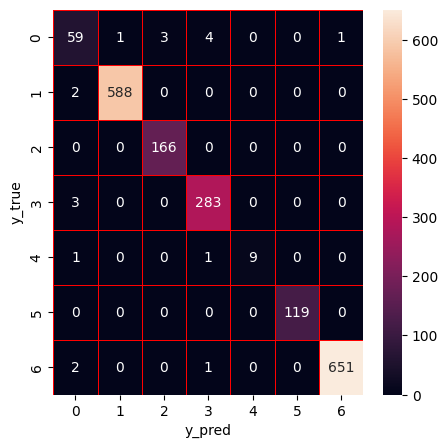


Training Time: 0.13 seconds		Prediction Time: 0.0009 seconds		Testing Time: 0.56 seconds


In [ ]:
# Start recording training time
start_time = time.time()

# Decision tree training and prediction
dt = DecisionTreeClassifier(random_state = 0)

# instructing Decision tree model to learn from the provided training data
dt.fit(X_train_selected, y_train)

# Stop recording training time
end_time = time.time()

# Calculate the training time in seconds
training_time = end_time - start_time

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Start recording testing time
start_time = time.time()

# Calculating accuracy of Decision tree
dt_score = dt.score(X_test_selected, y_test)

# Using the trained Decision tree to make predictions on the test data (X_test_selected), and the predictions are stored in the y_predict_dt variable.
# Simultaneouly Calculating prediction time
# Start recording prediction time
start_time = time.time()
y_predict_dt = dt.predict(X_test_selected)
# Stop recording training time
end_time = time.time()
# Calculate the prediction time in seconds
prediction_time = end_time - start_time

# Copying y_test in y_true_dt variable for comparison and evaluation purposes.
y_true_dt = y_test

# Calculating several important classification evaluation metrics, including precision, recall, F1-score, and support.
precision_dt, recall_dt, fscore_dt, support_dt = precision_recall_fscore_support(y_true_dt, y_predict_dt, average='weighted')

print('Accuracy of Decision tree: ' + str(dt_score))
print('Precision of Decision tree: ' + str(precision_dt))
print('Recall of Decision tree: ' + str(recall_dt))
print('F1-score of Decision tree: ' + str(fscore_dt))
print(classification_report(y_true_dt, y_predict_dt))

# This snippet of code is used to create a heatmap of a confusion matrix
cm_dt = confusion_matrix(y_true_dt, y_predict_dt)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_dt, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Stop recording testing time
end_time = time.time()

# Calculate the testing time in seconds
testing_time = end_time - start_time

print()
print(f"Training Time: {training_time:.2f} seconds\t\tPrediction Time: {prediction_time:.4f} seconds\t\tTesting Time: {testing_time:.2f} seconds")

Accuracy of Extra trees: 0.9883843717001056
Precision of Extra trees: 0.9882828940186937
Recall of Extra trees: 0.9883843717001056
F1-score of Extra trees: 0.9883138930400821
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        68
           1       1.00      1.00      1.00       590
           2       0.98      1.00      0.99       166
           3       0.99      0.99      0.99       286
           4       0.82      0.82      0.82        11
           5       1.00      1.00      1.00       119
           6       1.00      1.00      1.00       654

    accuracy                           0.99      1894
   macro avg       0.95      0.95      0.95      1894
weighted avg       0.99      0.99      0.99      1894



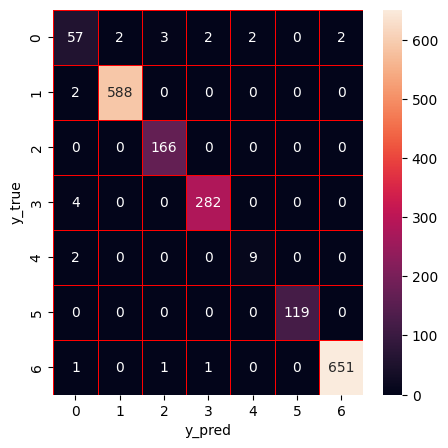


Training Time: 0.62 seconds		Prediction Time: 0.0466 seconds		Testing Time: 0.58 seconds


In [ ]:
# Start recording training time
start_time = time.time()

# Extra trees training and prediction
et = ExtraTreesClassifier(random_state = 0)

# instructing Extra trees model to learn from the provided training data
et.fit(X_train_selected, y_train)

# Stop recording training time
end_time = time.time()

# Calculate the training time in seconds
training_time = end_time - start_time

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Start recording testing time
start_time = time.time()

# Calculating accuracy of Extra trees
et_score = et.score(X_test_selected, y_test)

# Use the trained Extra trees to make predictions on the test data (X_test_selected), and the predictions are stored in the y_predict_et variable.
# Simultaneouly Calculating prediction time
# Start recording prediction time
start_time = time.time()
y_predict_et = et.predict(X_test_selected)
# Stop recording training time
end_time = time.time()
# Calculate the prediction time in seconds
prediction_time = end_time - start_time

# Copying y_test in y_true_et variable for comparison and evaluation purposes.
y_true_et = y_test

# Calculating several important classification evaluation metrics, including precision, recall, F1-score, and support.
precision_et, recall_et, fscore_et, support_et = precision_recall_fscore_support(y_true_et, y_predict_et, average='weighted')

print('Accuracy of Extra trees: ' + str(et_score))
print('Precision of Extra trees: ' + str(precision_et))
print('Recall of Extra trees: ' + str(recall_et))
print('F1-score of Extra trees: ' + str(fscore_et))
print(classification_report(y_true_et, y_predict_et))

# This snippet of code is used to create a heatmap of a confusion matrix
cm_et = confusion_matrix(y_true_et, y_predict_et)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_et, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Stop recording testing time
end_time = time.time()

# Calculate the testing time in seconds
testing_time = end_time - start_time

print()
print(f"Training Time: {training_time:.2f} seconds\t\tPrediction Time: {prediction_time:.4f} seconds\t\tTesting Time: {testing_time:.2f} seconds")

Accuracy of Gaussian Naive Bayes: 0.9287222808870116
Precision of Gaussian Naive Bayes: 0.9420508864687956
Recall of Gaussian Naive Bayes: 0.9287222808870116
F1-score of Gaussian Naive Bayes: 0.9303051310278925
              precision    recall  f1-score   support

           0       0.87      0.71      0.78        68
           1       0.95      1.00      0.97       590
           2       0.67      1.00      0.80       166
           3       0.96      0.80      0.87       286
           4       1.00      0.82      0.90        11
           5       1.00      1.00      1.00       119
           6       0.99      0.92      0.95       654

    accuracy                           0.93      1894
   macro avg       0.92      0.89      0.90      1894
weighted avg       0.94      0.93      0.93      1894



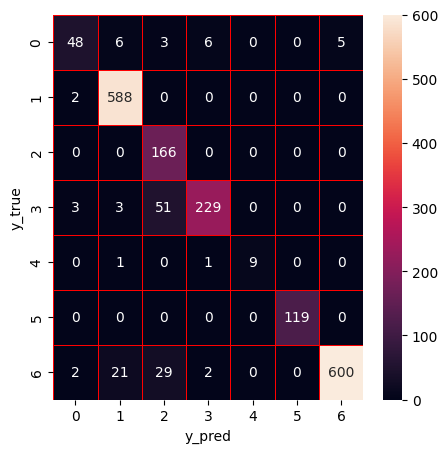


Training Time: 0.01 seconds		Prediction Time: 0.0052 seconds		Testing Time: 0.39 seconds


In [ ]:
# Start recording training time
start_time = time.time()

# Create a Gaussian Naive Bayes classifier
gnb_classifier = GaussianNB()

# Instruct the Gaussian Naive Bayes model to learn from the provided training data
gnb_classifier.fit(X_train_selected, y_train)

# Stop recording training time
end_time = time.time()

# Calculate the training time in seconds
training_time = end_time - start_time

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Start recording testing time
start_time = time.time()

# Calculating accuracy of Gaussian Naive Bayes Classifier
gnb_score = gnb_classifier.score(X_test_selected, y_test)

# Use the trained Gaussian Naive Bayes Classifier to make predictions on the test data (X_test_selected), and the predictions are stored in the y_predict_gnb variable.
# Simultaneously, calculate prediction time
# Start recording prediction time
start_time = time.time()
y_predict_gnb = gnb_classifier.predict(X_test_selected)
# Stop recording prediction time
end_time = time.time()
# Calculate the prediction time in seconds
prediction_time = end_time - start_time

# Copying y_test in y_true_gnb variable for comparison and evaluation purposes.
y_true_gnb = y_test

# Calculating several important classification evaluation metrics, including precision, recall, F1-score, and support.
precision_gnb, recall_gnb, fscore_gnb, support_gnb = precision_recall_fscore_support(y_true_gnb, y_predict_gnb, average='weighted')

print('Accuracy of Gaussian Naive Bayes: ' + str(gnb_score))
print('Precision of Gaussian Naive Bayes: ' + str(precision_gnb))
print('Recall of Gaussian Naive Bayes: ' + str(recall_gnb))
print('F1-score of Gaussian Naive Bayes: ' + str(fscore_gnb))
print(classification_report(y_true_gnb, y_predict_gnb))

# This snippet of code is used to create a heatmap of a confusion matrix
cm_gnb = confusion_matrix(y_true_gnb, y_predict_gnb)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_gnb, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Stop recording testing time
end_time = time.time()

# Calculate the testing time in seconds
testing_time = end_time - start_time

print()
print(f"Training Time: {training_time:.2f} seconds\t\tPrediction Time: {prediction_time:.4f} seconds\t\tTesting Time: {testing_time:.2f} seconds")

Accuracy of Gradient Boosting classifier: 0.9920802534318902
Precision of Gradient Boosting classifier: 0.9922084967190375
Recall of Gradient Boosting classifier: 0.9920802534318902
F1-score of Gradient Boosting classifier: 0.992082019553434
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        68
           1       1.00      1.00      1.00       590
           2       0.99      1.00      1.00       166
           3       0.99      0.99      0.99       286
           4       1.00      0.82      0.90        11
           5       0.99      1.00      1.00       119
           6       1.00      1.00      1.00       654

    accuracy                           0.99      1894
   macro avg       0.98      0.96      0.97      1894
weighted avg       0.99      0.99      0.99      1894



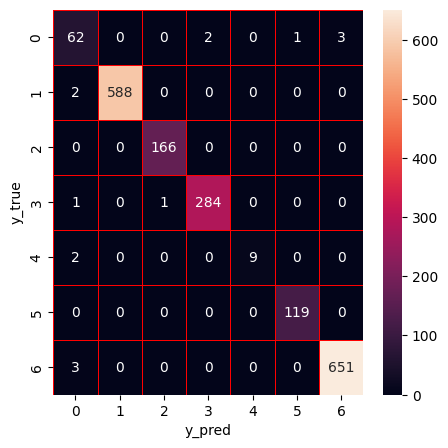


Training Time: 37.06 seconds		Prediction Time: 0.0204 seconds		Testing Time: 0.37 seconds


In [ ]:
# Start recording training time
start_time = time.time()

# Create a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()

# Instruct the Gradient Boosting model to learn from the selected training data
gb_classifier.fit(X_train_selected, y_train)

# Stop recording training time
end_time = time.time()

# Calculate the training time in seconds
training_time = end_time - start_time

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Start recording testing time
start_time = time.time()

# Calculating accuracy of Gradient Boosting Classifier
gb_score = gb_classifier.score(X_test_selected, y_test)

# Use the trained Gradient Boosting Classifier to make predictions on the test data (X_test_selected), and the predictions are stored in the y_predict_gb variable.
# Simultaneously, calculate prediction time
# Start recording prediction time
start_time = time.time()
y_predict_gb = gb_classifier.predict(X_test_selected)
# Stop recording prediction time
end_time = time.time()

# Calculate the prediction time in seconds
prediction_time = end_time - start_time

# Copying y_test in y_true_gb variable for comparison and evaluation purposes.
y_true_gb = y_test

# Calculating several important classification evaluation metrics, including precision, recall, F1-score, and support.
precision_gb, recall_gb, fscore_gb, support_gb = precision_recall_fscore_support(y_true_gb, y_predict_gb, average='weighted')

print('Accuracy of Gradient Boosting classifier: ' + str(gb_score))
print('Precision of Gradient Boosting classifier: ' + str(precision_gb))
print('Recall of Gradient Boosting classifier: ' + str(recall_gb))
print('F1-score of Gradient Boosting classifier: ' + str(fscore_gb))
print(classification_report(y_true_gb, y_predict_gb))

# This snippet of code is used to create a heatmap of a confusion matrix
cm_gb = confusion_matrix(y_true_gb, y_predict_gb)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_gb, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Stop recording testing time
end_time = time.time()

# Calculate the testing time in seconds
testing_time = end_time - start_time

print()
print(f"Training Time: {training_time:.2f} seconds\t\tPrediction Time: {prediction_time:.4f} seconds\t\tTesting Time: {testing_time:.2f} seconds")

Accuracy of K-Nearest Neighbors (KNN): 0.9783526927138332
Precision of K-Nearest Neighbors (KNN): 0.9779330310685272
Recall of K-Nearest Neighbors (KNN): 0.9783526927138332
F1-score of K-Nearest Neighbors (KNN): 0.9776593033547228
              precision    recall  f1-score   support

           0       0.91      0.71      0.79        68
           1       0.99      1.00      0.99       590
           2       0.94      0.96      0.95       166
           3       0.98      0.98      0.98       286
           4       0.83      0.91      0.87        11
           5       1.00      1.00      1.00       119
           6       0.98      0.99      0.99       654

    accuracy                           0.98      1894
   macro avg       0.95      0.94      0.94      1894
weighted avg       0.98      0.98      0.98      1894



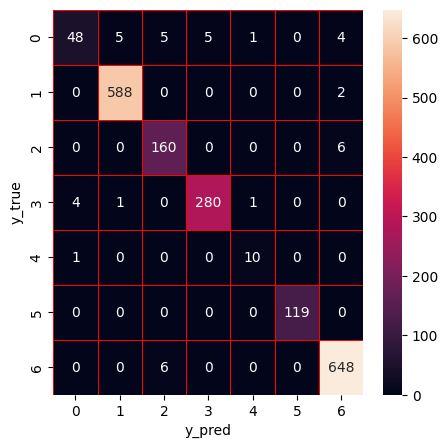


Training Time: 0.00 seconds		Prediction Time: 0.1791 seconds		Testing Time: 0.71 seconds


In [ ]:
# Start recording training time
start_time = time.time()

# Create a K-Nearest Neighbors (KNN) classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can specify the number of neighbors and other hyperparameters as needed

# instructing K-Nearest Neighbors (KNN) model to learn from the provided training data
knn_classifier.fit(X_train_selected, y_train)

# Stop recording training time
end_time = time.time()

# Calculate the training time in seconds
training_time = end_time - start_time

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Start recording testing time
start_time = time.time()

# Calculating accuracy of K-Nearest Neighbors (KNN) Classifier
knn_score = knn_classifier.score(X_test_selected, y_test)

# Use the trained K-Nearest Neighbors (KNN) classifier to make predictions on the test data (X_test_selected), and the predictions are stored in the y_predict_knn variable.
# Simultaneouly Calculating prediction time
# Start recording prediction time
start_time = time.time()
y_predict_knn = knn_classifier.predict(X_test_selected)
# Stop recording training time
end_time = time.time()
# Calculate the prediction time in seconds
prediction_time = end_time - start_time

# Copying y_test in y_true_knn variable for comparison and evaluation purposes.
y_true_knn = y_test

# Calculating several important classification evaluation metrics, including precision, recall, F1-score, and support.
precision_knn, recall_knn, fscore_knn, support_knn = precision_recall_fscore_support(y_true_knn, y_predict_knn, average='weighted')

print('Accuracy of K-Nearest Neighbors (KNN): ' + str(knn_score))
print('Precision of K-Nearest Neighbors (KNN): ' + str(precision_knn))
print('Recall of K-Nearest Neighbors (KNN): ' + str(recall_knn))
print('F1-score of K-Nearest Neighbors (KNN): ' + str(fscore_knn))
print(classification_report(y_true_knn, y_predict_knn))

# This snippet of code is used to create a heatmap of a confusion matrix
cm_knn = confusion_matrix(y_true_knn, y_predict_knn)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_knn, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Stop recording testing time
end_time = time.time()

# Calculate the testing time in seconds
testing_time = end_time - start_time

print()
print(f"Training Time: {training_time:.2f} seconds\t\tPrediction Time: {prediction_time:.4f} seconds\t\tTesting Time: {testing_time:.2f} seconds")

Accuracy of OvR Logistic Regression classifier: 0.9033790918690602
Precision of OvR Logistic Regression classifier: 0.9089888365262738
Recall of OvR Logistic Regression classifier: 0.9033790918690602
F1-score of OvR Logistic Regression classifier: 0.8963729676627608
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        68
           1       0.90      0.98      0.94       590
           2       0.81      0.80      0.80       166
           3       0.90      0.98      0.94       286
           4       0.62      0.91      0.74        11
           5       1.00      0.48      0.65       119
           6       0.93      0.95      0.94       654

    accuracy                           0.90      1894
   macro avg       0.88      0.80      0.81      1894
weighted avg       0.91      0.90      0.90      1894



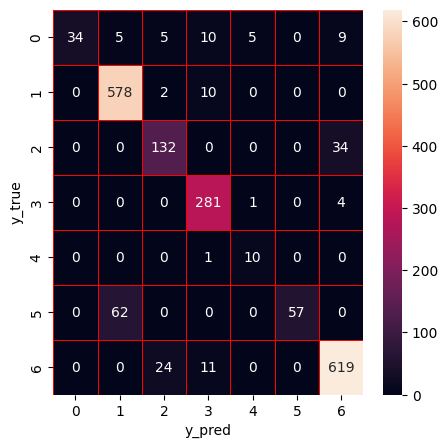


Training Time: 0.45 seconds		Prediction Time: 0.0044 seconds		Testing Time: 0.57 seconds


In [ ]:
# Start recording training time
start_time = time.time()

# Create a Logistic Regression classifier with the One-Versus-Rest (OvR) strategy
ovr_classifier = LogisticRegression(multi_class='ovr')

# Instruct the OvR model to learn from the provided training data
ovr_classifier.fit(X_train_selected, y_train)

# Stop recording training time
end_time = time.time()

# Calculate the training time in seconds
training_time = end_time - start_time

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Start recording testing time
start_time = time.time()

# Calculating accuracy of OvR Logistic Regression Classifier
ovr_score = ovr_classifier.score(X_test_selected, y_test)

# Use the trained OvR Logistic Regression Classifier to make predictions on the test data (X_test_selected), and the predictions are stored in the y_predict_ovr variable.
# Simultaneously, calculate prediction time
# Start recording prediction time
start_time = time.time()
y_predict_ovr = ovr_classifier.predict(X_test_selected)
# Stop recording prediction time
end_time = time.time()
# Calculate the prediction time in seconds
prediction_time = end_time - start_time

# Copying y_test in y_true_ovr variable for comparison and evaluation purposes.
y_true_ovr = y_test

# Calculating several important classification evaluation metrics, including precision, recall, F1-score, and support.
precision_ovr, recall_ovr, fscore_ovr, support_ovr = precision_recall_fscore_support(y_true_ovr, y_predict_ovr, average='weighted')

print('Accuracy of OvR Logistic Regression classifier: ' + str(ovr_score))
print('Precision of OvR Logistic Regression classifier: ' + str(precision_ovr))
print('Recall of OvR Logistic Regression classifier: ' + str(recall_ovr))
print('F1-score of OvR Logistic Regression classifier: ' + str(fscore_ovr))
print(classification_report(y_true_ovr, y_predict_ovr))

# This snippet of code is used to create a heatmap of a confusion matrix
cm_ovr = confusion_matrix(y_true_ovr, y_predict_ovr)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_ovr, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Stop recording testing time
end_time = time.time()

# Calculate the testing time in seconds
testing_time = end_time - start_time

print()
print(f"Training Time: {training_time:.2f} seconds\t\tPrediction Time: {prediction_time:.4f} seconds\t\tTesting Time: {testing_time:.2f} seconds")

Accuracy of OvO Logistic Regression classifier: 0.909714889123548
Precision of OvO Logistic Regression classifier: 0.9144576478037845
Recall of OvO Logistic Regression classifier: 0.909714889123548
F1-score of OvO Logistic Regression classifier: 0.9028953407379374
              precision    recall  f1-score   support

           0       1.00      0.54      0.70        68
           1       0.90      0.99      0.94       590
           2       0.81      0.80      0.80       166
           3       0.92      0.98      0.95       286
           4       0.71      0.91      0.80        11
           5       1.00      0.48      0.65       119
           6       0.93      0.95      0.94       654

    accuracy                           0.91      1894
   macro avg       0.90      0.81      0.83      1894
weighted avg       0.91      0.91      0.90      1894



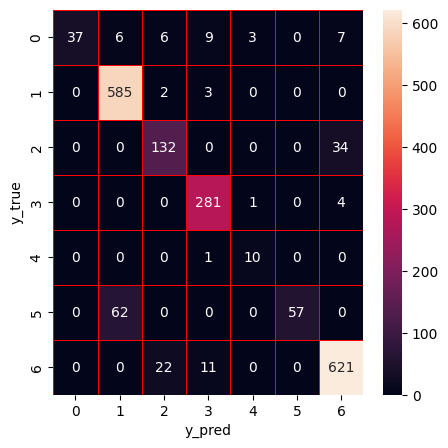


Training Time: 0.73 seconds		Prediction Time: 0.0024 seconds		Testing Time: 0.62 seconds


In [ ]:
# Start recording training time
start_time = time.time()

# Create a Logistic Regression classifier with the One-Versus-One (OvO) strategy
ovo_classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Instruct the OvO model to learn from the provided training data
ovo_classifier.fit(X_train_selected, y_train)

# Stop recording training time
end_time = time.time()

# Calculate the training time in seconds
training_time = end_time - start_time

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Start recording testing time
start_time = time.time()

# Calculating accuracy of OvO Logistic Regression Classifier
ovo_score = ovo_classifier.score(X_test_selected, y_test)

# Use the trained OvO Logistic Regression Classifier to make predictions on the test data (X_test_selected), and the predictions are stored in the y_predict_ovo variable.
# Simultaneously, calculate prediction time
# Start recording prediction time
start_time = time.time()
y_predict_ovo = ovo_classifier.predict(X_test_selected)
# Stop recording prediction time
end_time = time.time()
# Calculate the prediction time in seconds
prediction_time = end_time - start_time

# Copying y_test in y_true_ovo variable for comparison and evaluation purposes.
y_true_ovo = y_test

# Calculating several important classification evaluation metrics, including precision, recall, F1-score, and support.
precision_ovo, recall_ovo, fscore_ovo, support_ovo = precision_recall_fscore_support(y_true_ovo, y_predict_ovo, average='weighted')

print('Accuracy of OvO Logistic Regression classifier: ' + str(ovo_score))
print('Precision of OvO Logistic Regression classifier: ' + str(precision_ovo))
print('Recall of OvO Logistic Regression classifier: ' + str(recall_ovo))
print('F1-score of OvO Logistic Regression classifier: ' + str(fscore_ovo))
print(classification_report(y_true_ovo, y_predict_ovo))

# This snippet of code is used to create a heatmap of a confusion matrix
cm_ovo = confusion_matrix(y_true_ovo, y_predict_ovo)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_ovo, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Stop recording testing time
end_time = time.time()

# Calculate the testing time in seconds
testing_time = end_time - start_time

print()
print(f"Training Time: {training_time:.2f} seconds\t\tPrediction Time: {prediction_time:.4f} seconds\t\tTesting Time: {testing_time:.2f} seconds")

Accuracy of ML_Perceptron: 0.9656810982048575
Precision of ML_Perceptron: 0.9657005793502267
Recall of ML_Perceptron: 0.9656810982048575
F1-score of ML_Perceptron: 0.9647863325241086
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        68
           1       1.00      1.00      1.00       590
           2       0.96      0.80      0.87       166
           3       0.96      0.98      0.97       286
           4       0.91      0.91      0.91        11
           5       1.00      1.00      1.00       119
           6       0.95      0.98      0.97       654

    accuracy                           0.97      1894
   macro avg       0.95      0.93      0.94      1894
weighted avg       0.97      0.97      0.96      1894



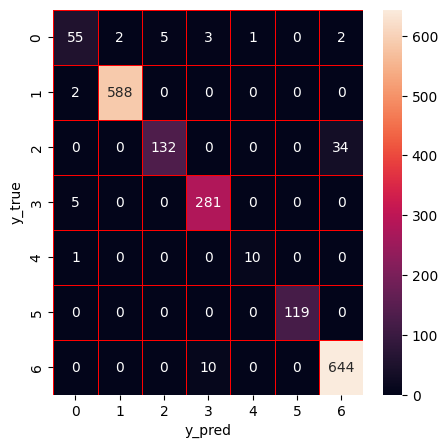


Training Time: 10.30 seconds		Prediction Time: 0.0031 seconds		Testing Time: 0.38 seconds


In [ ]:
# Start recording training time
start_time = time.time()

# Create an ML_Perceptron classifier
mlp_classifier = MLPClassifier()

# Instruct the ML_Perceptron model to learn from the provided training data
mlp_classifier.fit(X_train_selected, y_train)

# Stop recording training time
end_time = time.time()

# Calculate the training time in seconds
training_time = end_time - start_time

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Start recording testing time
start_time = time.time()

# Calculating accuracy of ML_Perceptron Classifier
mlp_score = mlp_classifier.score(X_test_selected, y_test)

# Use the trained ML_Perceptron Classifier to make predictions on the test data (X_test_selected), and the predictions are stored in the y_predict_mlp variable.
# Simultaneously, calculate prediction time
# Start recording prediction time
start_time = time.time()
y_predict_mlp = mlp_classifier.predict(X_test_selected)
# Stop recording prediction time
end_time = time.time()
# Calculate the prediction time in seconds
prediction_time = end_time - start_time

# Copying y_test in y_true_mlp variable for comparison and evaluation purposes.
y_true_mlp = y_test

# Calculating several important classification evaluation metrics, including precision, recall, F1-score, and support.
precision_mlp, recall_mlp, fscore_mlp, support_mlp = precision_recall_fscore_support(y_true_mlp, y_predict_mlp, average='weighted')

print('Accuracy of ML_Perceptron: ' + str(mlp_score))
print('Precision of ML_Perceptron: ' + str(precision_mlp))
print('Recall of ML_Perceptron: ' + str(recall_mlp))
print('F1-score of ML_Perceptron: ' + str(fscore_mlp))
print(classification_report(y_true_mlp, y_predict_mlp))

# This snippet of code is used to create a heatmap of a confusion matrix
cm_mlp = confusion_matrix(y_true_mlp, y_predict_mlp)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_mlp, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Stop recording testing time
end_time = time.time()

# Calculate the testing time in seconds
testing_time = end_time - start_time

print()
print(f"Training Time: {training_time:.2f} seconds\t\tPrediction Time: {prediction_time:.4f} seconds\t\tTesting Time: {testing_time:.2f} seconds")

Accuracy of Multinomial Naive Bayes: 0.5844772967265047
Precision of Multinomial Naive Bayes: 0.5700477790205295
Recall of Multinomial Naive Bayes: 0.5844772967265047
F1-score of Multinomial Naive Bayes: 0.5458901171754564
              precision    recall  f1-score   support

           0       0.12      0.01      0.03        68
           1       0.51      0.42      0.46       590
           2       0.79      0.35      0.49       166
           3       0.96      0.67      0.79       286
           4       0.23      0.91      0.37        11
           5       0.00      0.00      0.00       119
           6       0.55      0.92      0.69       654

    accuracy                           0.58      1894
   macro avg       0.45      0.47      0.40      1894
weighted avg       0.57      0.58      0.55      1894



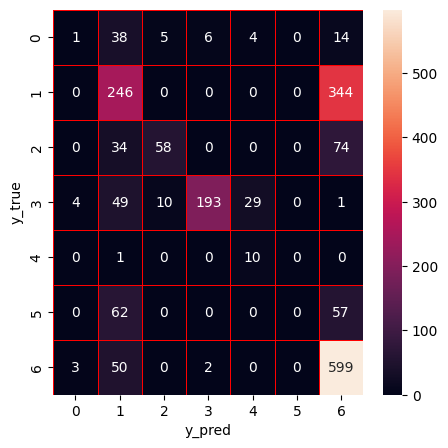


Training Time: 0.01 seconds		Prediction Time: 0.0009 seconds		Testing Time: 0.37 seconds


In [ ]:
# Start recording training time
start_time = time.time()

# Create a Multinomial Naive Bayes classifier
multinomial_classifier = MultinomialNB()

# Instruct the Multinomial Naive Bayes model to learn from the provided training data
multinomial_classifier.fit(X_train_selected, y_train)

# Stop recording training time
end_time = time.time()

# Calculate the training time in seconds
training_time = end_time - start_time

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Start recording testing time
start_time = time.time()

# Calculating accuracy of Multinomial Naive Bayes Classifier
mnb_score = multinomial_classifier.score(X_test_selected, y_test)

# Use the trained Multinomial Naive Bayes Classifier to make predictions on the test data (X_test_selected), and the predictions are stored in the y_predict_mnb variable.
# Simultaneously, calculate prediction time
# Start recording prediction time
start_time = time.time()
y_predict_mnb = multinomial_classifier.predict(X_test_selected)
# Stop recording prediction time
end_time = time.time()
# Calculate the prediction time in seconds
prediction_time = end_time - start_time

# Copying y_test in y_true_mnb variable for comparison and evaluation purposes.
y_true_mnb = y_test

# Calculating several important classification evaluation metrics, including precision, recall, F1-score, and support.
precision_mnb, recall_mnb, fscore_mnb, support_mnb = precision_recall_fscore_support(y_true_mnb, y_predict_mnb, average='weighted')

print('Accuracy of Multinomial Naive Bayes: ' + str(mnb_score))
print('Precision of Multinomial Naive Bayes: ' + str(precision_mnb))
print('Recall of Multinomial Naive Bayes: ' + str(recall_mnb))
print('F1-score of Multinomial Naive Bayes: ' + str(fscore_mnb))
print(classification_report(y_true_mnb, y_predict_mnb))

# This snippet of code is used to create a heatmap of a confusion matrix
cm_mnb = confusion_matrix(y_true_mnb, y_predict_mnb)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_mnb, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Stop recording testing time
end_time = time.time()

# Calculate the testing time in seconds
testing_time = end_time - start_time

print()
print(f"Training Time: {training_time:.2f} seconds\t\tPrediction Time: {prediction_time:.4f} seconds\t\tTesting Time: {testing_time:.2f} seconds")

Accuracy of Passive Aggressive Classifier: 0.9197465681098205
Precision of Passive Aggressive Classifier: 0.922120055592096
Recall of Passive Aggressive Classifier: 0.9197465681098205
F1-score of Passive Aggressive Classifier: 0.9133551077939884
              precision    recall  f1-score   support

           0       0.88      0.56      0.68        68
           1       0.90      0.99      0.94       590
           2       0.91      0.80      0.85       166
           3       0.92      0.99      0.95       286
           4       0.90      0.82      0.86        11
           5       1.00      0.51      0.68       119
           6       0.94      0.97      0.96       654

    accuracy                           0.92      1894
   macro avg       0.92      0.80      0.85      1894
weighted avg       0.92      0.92      0.91      1894



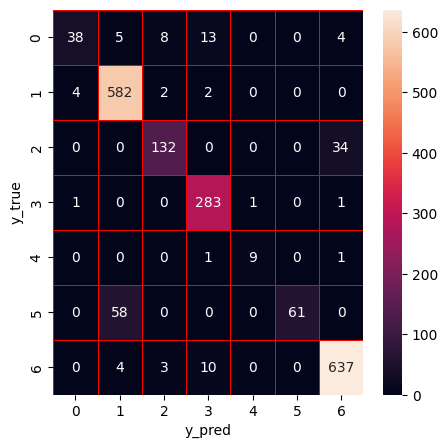


Training Time: 0.22 seconds		Prediction Time: 0.0009 seconds		Testing Time: 0.38 seconds


In [ ]:
# Start recording training time
start_time = time.time()

# Create a Passive Aggressive Classifier
pac_classifier = PassiveAggressiveClassifier()

# instructing Passive Aggressive model to learn from the provided training data
pac_classifier.fit(X_train_selected, y_train)

# Stop recording training time
end_time = time.time()

# Calculate the training time in seconds
training_time = end_time - start_time

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Start recording testing time
start_time = time.time()

# Calculating accuracy of Passive Aggressive Classifier
pac_score = pac_classifier.score(X_test_selected, y_test)

# Use the trained Passive Aggressive Classifier to make predictions on the test data (X_test_selected), and the predictions are stored in the y_predict_pac variable.
# Simultaneouly Calculating prediction time
# Start recording prediction time
start_time = time.time()
y_predict_pac = pac_classifier.predict(X_test_selected)
# Stop recording training time
end_time = time.time()
# Calculate the prediction time in seconds
prediction_time = end_time - start_time

# Copying y_test in y_true_pac variable for comparison and evaluation purposes.
y_true_pac = y_test

# Calculating several important classification evaluation metrics, including precision, recall, F1-score, and support.
precision_pac, recall_pac, fscore_pac, support_pac = precision_recall_fscore_support(y_true_pac, y_predict_pac, average='weighted')

print('Accuracy of Passive Aggressive Classifier: ' + str(pac_score))
print('Precision of Passive Aggressive Classifier: ' + str(precision_pac))
print('Recall of Passive Aggressive Classifier: ' + str(recall_pac))
print('F1-score of Passive Aggressive Classifier: ' + str(fscore_pac))
print(classification_report(y_true_pac, y_predict_pac))

# This snippet of code is used to create a heatmap of a confusion matrix
cm_pac = confusion_matrix(y_true_pac, y_predict_pac)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_pac, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Stop recording testing time
end_time = time.time()

# Calculate the testing time in seconds
testing_time = end_time - start_time

print()
print(f"Training Time: {training_time:.2f} seconds\t\tPrediction Time: {prediction_time:.4f} seconds\t\tTesting Time: {testing_time:.2f} seconds")

Accuracy of Random Forest: 0.9889123548046462
Precision of Random Forest: 0.9887638573869384
Recall of Random Forest: 0.9889123548046462
F1-score of Random Forest: 0.9888127701219092
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        68
           1       1.00      1.00      1.00       590
           2       0.98      1.00      0.99       166
           3       0.98      0.99      0.99       286
           4       0.82      0.82      0.82        11
           5       1.00      1.00      1.00       119
           6       1.00      1.00      1.00       654

    accuracy                           0.99      1894
   macro avg       0.95      0.95      0.95      1894
weighted avg       0.99      0.99      0.99      1894



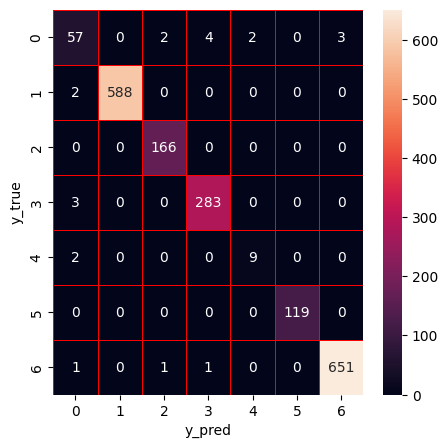


Training Time: 0.97 seconds		Prediction Time: 0.0289 seconds		Testing Time: 0.49 seconds


In [ ]:
# Start recording training time
start_time = time.time()

# Random Forest training and prediction
rf = RandomForestClassifier(random_state = 0)

# instructing Random Forest model to learn from the provided training data
rf.fit(X_train_selected, y_train)

# Stop recording training time
end_time = time.time()

# Calculate the training time in seconds
training_time = end_time - start_time

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Start recording testing time
start_time = time.time()

# Calculating accuracy of Random Forest
rf_score = rf.score(X_test_selected, y_test)

# Use the trained Random Forest to make predictions on the test data (X_test_selected), and the predictions are stored in the y_predict_rf variable.
# Simultaneouly Calculating prediction time
# Start recording prediction time
start_time = time.time()
y_predict_rf = rf.predict(X_test_selected)
# Stop recording training time
end_time = time.time()
# Calculate the prediction time in seconds
prediction_time = end_time - start_time

# Copying y_test in y_true_rf variable for comparison and evaluation purposes.
y_true_rf = y_test

# Calculating several important classification evaluation metrics, including precision, recall, F1-score, and support.
precision_rf, recall_rf, fscore_rf, support_rf = precision_recall_fscore_support(y_true_rf, y_predict_rf, average='weighted')

print('Accuracy of Random Forest: ' + str(rf_score))
print('Precision of Random Forest: ' + str(precision_rf))
print('Recall of Random Forest: ' + str(recall_rf))
print('F1-score of Random Forest: ' + str(fscore_rf))
print(classification_report(y_true_rf, y_predict_rf))

# This snippet of code is used to create a heatmap of a confusion matrix
cm_rf = confusion_matrix(y_true_rf, y_predict_rf)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Stop recording testing time
end_time = time.time()

# Calculate the testing time in seconds
testing_time = end_time - start_time

print()
print(f"Training Time: {training_time:.2f} seconds\t\tPrediction Time: {prediction_time:.4f} seconds\t\tTesting Time: {testing_time:.2f} seconds")

Accuracy of Ridge Classifier: 0.8495248152059134
Precision of Ridge Classifier: 0.8145584392217028
Recall of Ridge Classifier: 0.8495248152059134
F1-score of Ridge Classifier: 0.8237856994288401
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        68
           1       0.80      0.98      0.88       590
           2       0.58      0.80      0.67       166
           3       0.91      0.98      0.94       286
           4       0.60      0.82      0.69        11
           5       0.00      0.00      0.00       119
           6       0.98      0.88      0.93       654

    accuracy                           0.85      1894
   macro avg       0.70      0.71      0.68      1894
weighted avg       0.81      0.85      0.82      1894



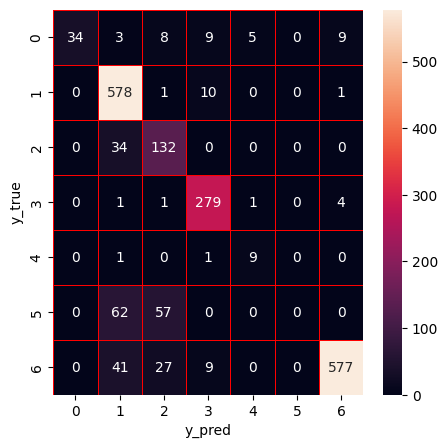


Training Time: 0.02 seconds		Prediction Time: 0.0029 seconds		Testing Time: 0.59 seconds


In [ ]:
# Start recording training time
start_time = time.time()

# Create a Ridge Classifier
ridge_classifier = RidgeClassifier()

# instructing Ridge model to learn from the provided training data
ridge_classifier.fit(X_train_selected, y_train)

# Stop recording training time
end_time = time.time()

# Calculate the training time in seconds
training_time = end_time - start_time

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Start recording testing time
start_time = time.time()

# Calculating accuracy of Ridge Classifier
ridge_score = ridge_classifier.score(X_test_selected, y_test)

# Use the trained Ridge Classifier to make predictions on the test data (X_test_selected), and the predictions are stored in the y_predict_ridge variable.
# Simultaneouly Calculating prediction time
# Start recording prediction time
start_time = time.time()
y_predict_ridge = ridge_classifier.predict(X_test_selected)
# Stop recording training time
end_time = time.time()
# Calculate the prediction time in seconds
prediction_time = end_time - start_time

# Copying y_test in y_true_ridge variable for comparison and evaluation purposes.
y_true_ridge = y_test

# Calculating several important classification evaluation metrics, including precision, recall, F1-score, and support.
precision_ridge, recall_ridge, fscore_ridge, support_ridge = precision_recall_fscore_support(y_true_ridge, y_predict_ridge, average='weighted')

print('Accuracy of Ridge Classifier: ' + str(ridge_score))
print('Precision of Ridge Classifier: ' + str(precision_ridge))
print('Recall of Ridge Classifier: ' + str(recall_ridge))
print('F1-score of Ridge Classifier: ' + str(fscore_ridge))
print(classification_report(y_true_ridge, y_predict_ridge))

# This snippet of code is used to create a heatmap of a confusion matrix
cm_ridge = confusion_matrix(y_true_ridge, y_predict_ridge)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_ridge, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Stop recording testing time
end_time = time.time()

# Calculate the testing time in seconds
testing_time = end_time - start_time

print()
print(f"Training Time: {training_time:.2f} seconds\t\tPrediction Time: {prediction_time:.4f} seconds\t\tTesting Time: {testing_time:.2f} seconds")

Accuracy of SVM classifier: 0.9160506863780359
Precision of SVM classifier: 0.9188256436626101
Recall of SVM classifier: 0.9160506863780359
F1-score of SVM classifier: 0.910613211163296
              precision    recall  f1-score   support

           0       0.98      0.59      0.73        68
           1       0.91      0.99      0.95       590
           2       0.81      0.80      0.80       166
           3       0.92      0.99      0.96       286
           4       0.83      0.91      0.87        11
           5       0.98      0.53      0.69       119
           6       0.94      0.95      0.94       654

    accuracy                           0.92      1894
   macro avg       0.91      0.82      0.85      1894
weighted avg       0.92      0.92      0.91      1894



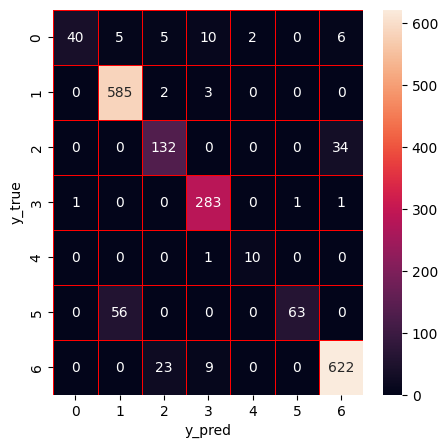


Training Time: 0.51 seconds		Prediction Time: 0.4355 seconds		Testing Time: 1.17 seconds


In [ ]:
# Start recording training time
start_time = time.time()

# Create an SVM classifier
svm_classifier = SVC()

# instructing SVM model to learn from the provided training data
svm_classifier.fit(X_train_selected, y_train)

# Stop recording training time
end_time = time.time()

# Calculate the training time in seconds
training_time = end_time - start_time

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Start recording testing time
start_time = time.time()

# Calculating accuracy of SVM Classifier
svm_score = svm_classifier.score(X_test_selected, y_test)

# Use the trained SVM Classifier to make predictions on the test data (X_test_selected), and the predictions are stored in the y_predict_svm variable.
# Simultaneouly Calculating prediction time
# Start recording prediction time
start_time = time.time()
y_predict_svm = svm_classifier.predict(X_test_selected)
# Stop recording training time
end_time = time.time()
# Calculate the prediction time in seconds
prediction_time = end_time - start_time

# Copying y_test in y_true_svm variable for comparison and evaluation purposes.
y_true_svm = y_test

# Calculating several important classification evaluation metrics, including precision, recall, F1-score, and support.
precision_svm, recall_svm, fscore_svm, support_svm = precision_recall_fscore_support(y_true_svm, y_predict_svm, average='weighted')

print('Accuracy of SVM classifier: ' + str(svm_score))
print('Precision of SVM classifier: ' + str(precision_svm))
print('Recall of SVM classifier: ' + str(recall_svm))
print('F1-score of SVM classifier: ' + str(fscore_svm))
print(classification_report(y_true_svm, y_predict_svm))

# This snippet of code is used to create a heatmap of a confusion matrix
cm_svm = confusion_matrix(y_true_svm, y_predict_svm)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_svm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Stop recording testing time
end_time = time.time()

# Calculate the testing time in seconds
testing_time = end_time - start_time

print()
print(f"Training Time: {training_time:.2f} seconds\t\tPrediction Time: {prediction_time:.4f} seconds\t\tTesting Time: {testing_time:.2f} seconds")

Accuracy of XGboost: 0.9873284054910243
Precision of XGboost: 0.9868245111821512
Recall of XGboost: 0.9873284054910243
F1-score of XGboost: 0.9868916428105848
              precision    recall  f1-score   support

           0       0.88      0.76      0.82        68
           1       1.00      1.00      1.00       590
           2       0.97      1.00      0.99       166
           3       0.99      1.00      0.99       286
           4       0.90      0.82      0.86        11
           5       1.00      1.00      1.00       119
           6       0.99      1.00      0.99       654

    accuracy                           0.99      1894
   macro avg       0.96      0.94      0.95      1894
weighted avg       0.99      0.99      0.99      1894



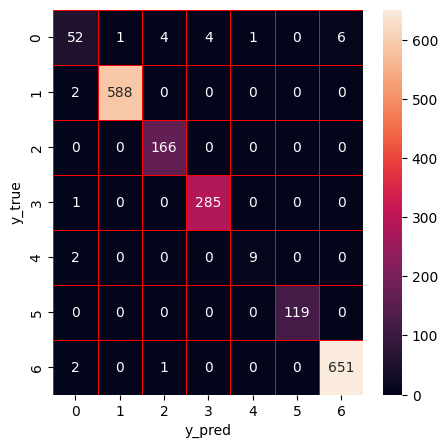


Training Time: 1.16 seconds		Prediction Time: 0.0036 seconds		Testing Time: 0.37 seconds


In [ ]:
# Start recording training time
start_time = time.time()

# XGboost training and prediction
xg = xgb.XGBClassifier(n_estimators = 10)

# instructing XGboost model to learn from the provided training data
xg.fit(X_train_selected, y_train)

# Stop recording training time
end_time = time.time()

# Calculate the training time in seconds
training_time = end_time - start_time

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Start recording testing time
start_time = time.time()

# Calculating accuracy of XGboost Classifier
xg_score = xg.score(X_test_selected, y_test)

# Use the trained XGboost Classifier to make predictions on the test data (X_test_selected), and the predictions are stored in the y_predict_xg variable.
# Simultaneouly Calculating prediction time
# Start recording prediction time
start_time = time.time()
y_predict_xg = xg.predict(X_test_selected)
# Stop recording training time
end_time = time.time()
# Calculate the prediction time in seconds
prediction_time = end_time - start_time

# Copying y_test in y_true_xg variable for comparison and evaluation purposes.
y_true_xg = y_test

# Calculating several important classification evaluation metrics, including precision, recall, F1-score, and support.
precision_xg, recall_xg, fscore_xg, support_xg = precision_recall_fscore_support(y_true_xg, y_predict_xg, average='weighted')

print('Accuracy of XGboost: ' + str(xg_score))
print('Precision of XGboost: ' + str(precision_xg))
print('Recall of XGboost: ' + str(recall_xg))
print('F1-score of XGboost: ' + str(fscore_xg))
print(classification_report(y_true_xg, y_predict_xg))

# This snippet of code is used to create a heatmap of a confusion matrix
cm_xg = confusion_matrix(y_true_xg, y_predict_xg)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_xg, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Stop recording testing time
end_time = time.time()

# Calculate the testing time in seconds
testing_time = end_time - start_time

print()
print(f"Training Time: {training_time:.2f} seconds\t\tPrediction Time: {prediction_time:.4f} seconds\t\tTesting Time: {testing_time:.2f} seconds")

In [ ]:
print("Happy :)")


Happy :)
